<a href="https://colab.research.google.com/github/Hamza-Khan993/GRIP-at-The-Spark-Foundation/blob/master/Task_2_To_Explore_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**


***In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.***


***What will be predicted score if a student study for 9.25 hrs in a
day?***

Importing all neccessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Extracting Data and creating a dataframe using Pandas

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print(data.size)
data.head()


50


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Understanding correlation between dependent and independent variable
 

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

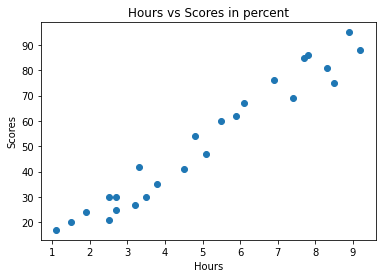

In [ ]:
plt.scatter(data['Hours'],data["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores in percent")
plt.show()

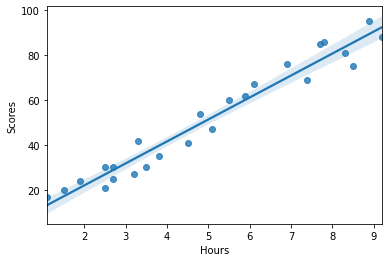

In [ ]:
sns.regplot(data['Hours'],data["Scores"])
plt.show()

Both dependent and independent variables are linearly variable to each other

X = Independent Variable

Y= Dependent Variable

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, 1].values  
# print(X)
# print(X.shape)
# print(Y)
# print(Y.shape)

**Splitting Data into training and testing sets**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size= 0.2 , random_state = 42)


In [ ]:
lm = LinearRegression()

**Training Model**

In [ ]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
w = lm.coef_
b = lm.intercept_
print(w,b)

[9.68207815] 2.826892353899737


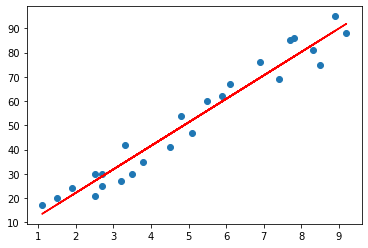

In [ ]:
best_fit_line = w*X + b
plt.scatter(X,Y)
plt.plot(X, best_fit_line,color="red")
plt.show()

**Prediction Using Testing set**

In [ ]:
yhat = lm.predict(X_test)
print(yhat)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


Comparing with actual Values

In [ ]:
Y_test

array([81, 30, 21, 76, 62])

In [ ]:
data_compare = pd.DataFrame({'Actual': Y_test, 'Predicted': yhat})
data_compare

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Calculating the Accuracy of the model

In [ ]:
accuracy = r2_score(Y_test, yhat)
print("The accuracy of our model is :", accuracy*100, "percent")

The accuracy of our model is : 94.54906892105353 percent


****Evaluation****

In [ ]:
no_of_hours = 9.25
n_hours = np.array(no_of_hours).reshape(1,-1)
n_hours
calculated_score = lm.predict(n_hours)
print("If a Student Studies for ", no_of_hours, " hours a day he/she will score :", calculated_score[0][0], "%")

If a Student Studies for  9.25  hours a day he/she will score : 93.69173248737539 %


## **For the Same Problem I've used Pytorch to train the model and evaluate the results**

---



In [5]:
import torch
from torch.autograd import Variable
import numpy as np

In [13]:
input = np.array(data[['Hours']] , dtype = "float32")
inputs = torch.tensor(inputs, requires_grad=True)
output = np.array(data[['Scores']], dtype='float32')
outputs = torch.tensor(output, requires_grad=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [8]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [62]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [63]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [64]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(input).cuda())
        labels = Variable(torch.from_numpy(output).cuda())
    else:
        inputs = Variable(torch.from_numpy(input))
        labels = Variable(torch.from_numpy(output))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    # print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    if (epoch+1) % 5 == 0 :
      print('epoch [{}/{}], loss {}'.format(epoch+1,epochs, loss.item()))

epoch [5/100], loss 1766.66650390625
epoch [10/100], loss 924.8540649414062
epoch [15/100], loss 490.83563232421875
epoch [20/100], loss 267.0663146972656
epoch [25/100], loss 151.69613647460938
epoch [30/100], loss 92.21400451660156
epoch [35/100], loss 61.54645538330078
epoch [40/100], loss 45.73495101928711
epoch [45/100], loss 37.582908630371094
epoch [50/100], loss 33.379859924316406
epoch [55/100], loss 31.212841033935547
epoch [60/100], loss 30.095529556274414
epoch [65/100], loss 29.519433975219727
epoch [70/100], loss 29.22235679626465
epoch [75/100], loss 29.06915283203125
epoch [80/100], loss 28.990121841430664
epoch [85/100], loss 28.949329376220703
epoch [90/100], loss 28.928255081176758
epoch [95/100], loss 28.9173583984375
epoch [100/100], loss 28.91167449951172


[[26.485493]
 [52.21047 ]
 [33.411446]
 [85.85082 ]
 [36.379715]
 [16.59127 ]
 [92.77677 ]
 [56.168156]
 [83.87198 ]
 [28.464336]
 [77.93544 ]
 [60.125847]
 [46.273933]
 [34.400867]
 [12.633582]
 [89.8085  ]
 [26.485493]
 [20.548958]
 [62.104687]
 [74.96718 ]
 [28.464336]
 [49.242203]
 [39.34798 ]
 [70.020065]
 [78.924866]]


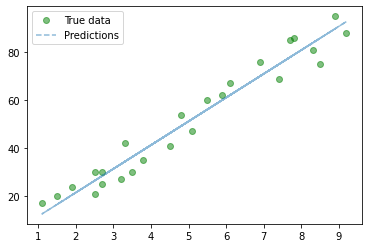

In [56]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(input).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(input))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(input, output, 'go', label='True data', alpha=0.5)
plt.plot(input, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [21]:
hours = [[9.25]]
hours_values = np.array(val, dtype = 'float32')
hours_values

array([[9.25]], dtype=float32)

In [22]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicter = model(Variable(torch.from_numpy(values).cuda())).cpu().data.numpy()
    else:
        predicter = model(Variable(torch.from_numpy(values))).data.numpy()
    print(predicter)

[[93.57146]]
